In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_excel('/content/iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [239]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [240]:
data.dtypes

,0
SL,float64
SW,float64
PL,float64
PW,float64
Classification,object


In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [242]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Missing Values

In [243]:

data.isnull().sum()

,0
SL,7
SW,6
PL,6
PW,0
Classification,0


In [244]:
#To check the distribution of the data

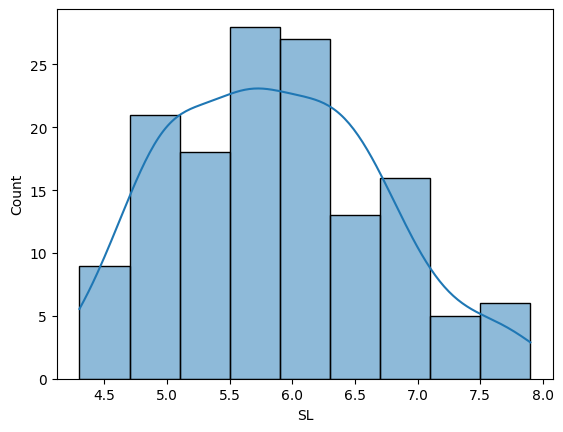

In [245]:
sns.histplot(data['SL'], kde=True)
plt.show()

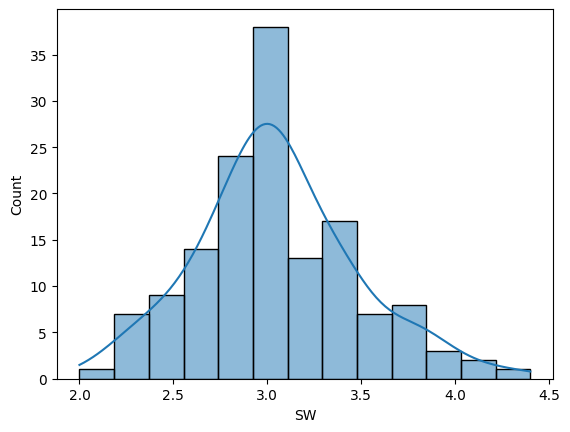

In [246]:
sns.histplot(data['SW'], kde=True)
plt.show()

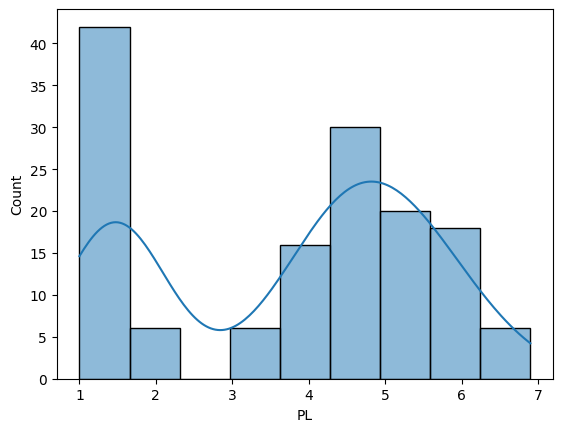

In [247]:
sns.histplot(data['PL'], kde=True)
plt.show()

In [248]:
#Handling missing values
# since SL & SW almost show normal behavior we use mean as replacement and median for PL
data['SL'] = data['SL'].fillna(data['SL'].mean())
data['SW'] = data['SW'].fillna(data['SW'].mean())
data['PL'] = data['PL'].fillna(data['PL'].median())

In [249]:
data.isnull().sum()

,0
SL,0
SW,0
PL,0
PW,0
Classification,0


# Duplicate Values

In [250]:

data.duplicated().sum()

3

In [251]:
data.drop_duplicates(inplace=True)

In [252]:
data.duplicated().sum()

0

In [253]:
data.shape

(147, 5)

# Outlier Detection

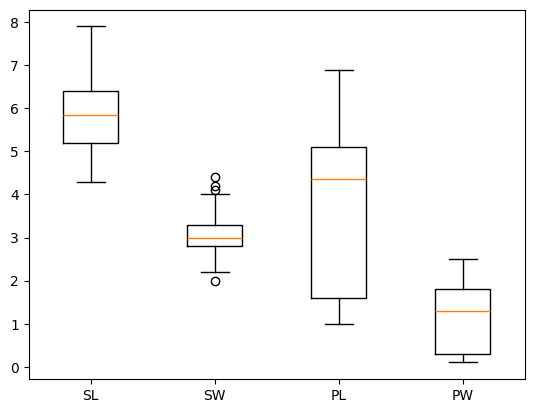

In [254]:
plt.boxplot(data[['SL','SW','PL','PW']].values)
plt.xticks([1, 2, 3, 4], ['SL', 'SW', 'PL', 'PW'])
plt.show()

In [255]:
Q1 =data['SW'].quantile(0.25)
Q3 =data['SW'].quantile(0.75)
IQR =Q3 -Q1

In [256]:
lower_bound = Q1 -1.5*IQR
upper_bound = Q3 +1.5*IQR

In [257]:
# find outlier
outliers = data[(data['SW']<lower_bound)|(data['SW']>upper_bound)]
outliers


,SL,SW,PL,PW,Classification
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [258]:
#remove outlier from data
data =data[(data['SW']>=lower_bound)&(data['SW']<=upper_bound)]
data.shape

(143, 5)

# Label Encoding

In [259]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])
data.head()


<ipython-input-259-142367a682e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Classification'] = le.fit_transform(data['Classification'])


,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [260]:
# splitting the data into x & y
x = data.drop(['Classification'],axis = 1)
y = data['Classification']

In [261]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state =42,test_size =0.25)

# KNN

In [262]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
metric_k =[]
neighbours = np.arange(1,15)
for k in neighbours:
  k_model = KNeighborsClassifier(n_neighbors=k)
  k_model.fit(x_train,y_train)
  y_pred = k_model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

metric_k

[0.8888888888888888,
 0.9166666666666666,
 0.8611111111111112,
 0.9166666666666666,
 0.8888888888888888,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9444444444444444,
 0.9166666666666666,
 0.9166666666666666,
 0.8888888888888888]

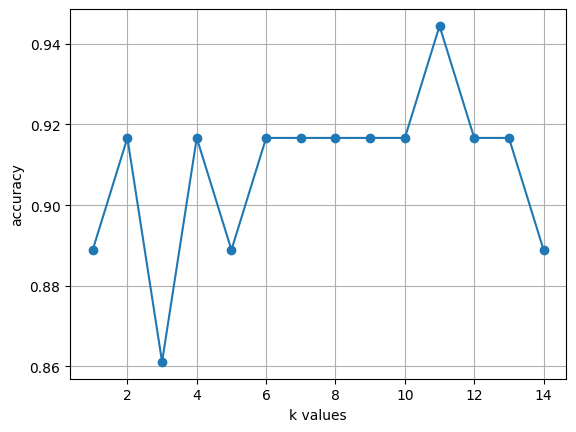

In [263]:
plt.plot(neighbours,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.grid()

In [264]:

k_model = KNeighborsClassifier(n_neighbors=9,metric='minkowski')
k_model.fit(x_train,y_train)
y_pred = k_model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 0.9166666666666666


# SVM

In [265]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train,y_train)
y_pred = svm_model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 0.8888888888888888


# Decision Tree

In [266]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 0.9166666666666666


# Random Forest

In [267]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 0.9166666666666666


#Naive Bayes

In [268]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
y_pred = nb_model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 0.9166666666666666
